Template for different way of handling outliers. Codes explanation are at https://youranalystbuddy.com/handling-outliers/

## Loading data and drop student ID

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('students1000.csv')
data = data.drop('StudentID', axis=1)
data.head(2)

,FirstName,LastName,Major,HighSchoolGPA,FamilyIncome,State,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
0,Baxter,Dengler,Computer Science,2.82,45013,WA,2.01,14.0,1.93
1,Christian,Wickey,Data Science,3.07,128358,GA,5.41,NaN,2.76


## Check outliers

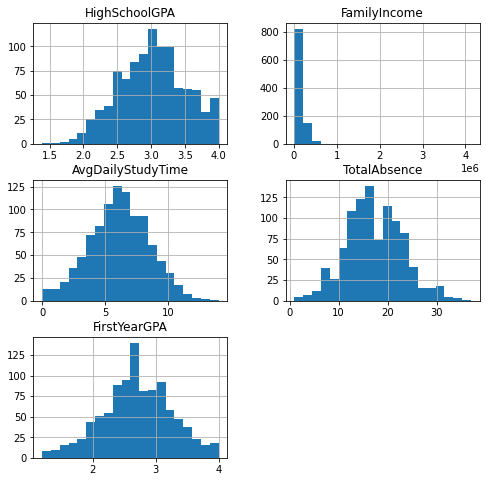

In [22]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(8,8))
plt.show()

In [3]:
data.describe()

,HighSchoolGPA,FamilyIncome,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
count,1000.000000,1.000000e+03,985.000000,990.000000,1000.000000
mean,3.017420,1.393459e+05,6.132305,17.222222,2.702000
std,0.491055,2.009381e+05,2.346976,5.785613,0.546332
min,1.390000,1.737800e+04,0.000000,1.000000,1.200000
25%,2.670000,5.031125e+04,4.610000,13.000000,2.360000
50%,3.030000,9.203800e+04,6.180000,17.000000,2.695000
75%,3.340000,1.741448e+05,7.760000,21.000000,3.072500
max,4.000000,4.125854e+06,13.970000,37.000000,4.000000


### Only FamilyIncome seems to have outliers

## Dropping outliers

First, create a list of numeric columns for more convenience in writing code later

In [5]:
num_cols = ['HighSchoolGPA','FamilyIncome','AvgDailyStudyTime','TotalAbsence','FirstYearGPA']

### Using means and standard deviation

n_sd is the multiplication factor, usually selected between 3 and 5

In [11]:
n_sd = 4 #setting an outlier threshold

data_nums = data[num_cols]
data_means = data_nums.mean() #get means of all numeric columns
data_stds = data_nums.std()     #get standard deviation of all numeric columns 
data_drp_outl = data[(np.abs(data_nums - data_means)/data_stds < n_sd).all(axis=1)]

In [12]:
data_drp_outl

,FirstName,LastName,Major,HighSchoolGPA,FamilyIncome,State,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
0,Baxter,Dengler,Computer Science,2.82,45013,WA,2.01,14.0,1.93
2,Lonnie,Wulff,Software Engineering,2.68,112392,GA,9.57,13.0,3.09
3,Mitchell,Deshotel,Software Engineering,3.21,190846,GA,8.57,16.0,3.08
4,Linwood,Willing,Information Technology,3.44,187163,GA,6.24,20.0,2.73
5,Rocco,Dandrea,Information Technology,2.70,39186,SC,7.68,12.0,3.37
...,...,...,...,...,...,...,...,...,...
995,Michael,Richman,Computer Science,4.00,32210,SC,8.84,16.0,3.31
996,Lacy,Anton,Software Engineering,3.02,163481,GA,6.61,17.0,2.53
997,Ell,Benke,Software Engineering,2.05,45446,GA,3.68,30.0,1.77
998,Elzie,Enderle,Information Technology,2.19,44714,GA,2.74,17.0,2.11


In [13]:
data_drp_outl.describe()

,HighSchoolGPA,FamilyIncome,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
count,971.000000,971.000000,971.000000,971.000000,971.000000
mean,3.016200,129266.330587,6.141936,17.226571,2.703522
std,0.489568,108027.666420,2.345634,5.801542,0.546798
min,1.390000,17378.000000,0.000000,1.000000,1.200000
25%,2.665000,50046.500000,4.610000,13.000000,2.360000
50%,3.030000,90722.000000,6.190000,17.000000,2.690000
75%,3.340000,173138.000000,7.770000,21.000000,3.080000
max,4.000000,866534.000000,13.970000,37.000000,4.000000


### Using median and IQR

n_iqr is usually between 2.2 and 3.5

In [15]:
n_iqr = 2.5

data_nums = data[num_cols]
data_med = data_nums.median()
data_iqr = data_nums.quantile(0.75) - data_nums.quantile(0.25)
data_drp_outl = data[(np.abs(data_nums - data_med)/data_iqr < n_iqr).all(axis=1)]

In [16]:
data_drp_outl.describe()

,HighSchoolGPA,FamilyIncome,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
count,942.000000,942.000000,942.000000,942.000000,942.000000
mean,3.021964,118544.063694,6.176327,17.233546,2.710679
std,0.488518,87823.709141,2.332453,5.726369,0.546230
min,1.390000,17378.000000,0.000000,1.000000,1.200000
25%,2.670000,49324.750000,4.630000,13.000000,2.372500
50%,3.030000,87877.000000,6.230000,17.000000,2.695000
75%,3.350000,164070.250000,7.780000,21.000000,3.080000
max,4.000000,399778.000000,13.970000,34.000000,4.000000


## Marking outliers

### Using mean and standard deviation

In [25]:
n_sd = 4

data_drp_outl = data.copy()
data_nums = data[num_cols]
data_means = data_nums.mean()
data_stds = data_nums.std()
data_drp_outl[np.abs(data_nums - data_means)/data_stds > n_sd] = np.nan

In [26]:
data_drp_outl.describe()

,HighSchoolGPA,FamilyIncome,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
count,1000.000000,996.000000,985.000000,990.000000,1000.000000
mean,3.017420,129729.229920,6.132305,17.222222,2.702000
std,0.491055,108286.605765,2.346976,5.785613,0.546332
min,1.390000,17378.000000,0.000000,1.000000,1.200000
25%,2.670000,50218.250000,4.610000,13.000000,2.360000
50%,3.030000,91606.000000,6.180000,17.000000,2.695000
75%,3.340000,173164.250000,7.760000,21.000000,3.072500
max,4.000000,866534.000000,13.970000,37.000000,4.000000


### Using median and IQR

In [27]:
n_iqr = 2.5                                                     

data_drp_outl = data.copy()
data_nums = data[num_cols]
data_med = data_nums.median()                                   
data_iqr = data_nums.quantile(0.75) - data_nums.quantile(0.25)
data_drp_outl[np.abs(data_nums - data_med)/data_iqr > n_iqr] = np.nan

In [28]:
data_drp_outl.describe()

,HighSchoolGPA,FamilyIncome,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
count,1000.000000,966.000000,985.000000,990.000000,1000.000000
mean,3.017420,118518.401656,6.132305,17.222222,2.702000
std,0.491055,87497.528478,2.346976,5.785613,0.546332
min,1.390000,17378.000000,0.000000,1.000000,1.200000
25%,2.670000,49324.750000,4.610000,13.000000,2.360000
50%,3.030000,88634.000000,6.180000,17.000000,2.695000
75%,3.340000,163885.250000,7.760000,21.000000,3.072500
max,4.000000,399778.000000,13.970000,37.000000,4.000000


## Clipping outliers

### Using mean and standard deviation

In [24]:
n_sd = 4

data_clp_outl = data.copy()
data_nums = data[num_cols]
data_means = data_nums.mean()
data_stds = data_nums.std()
data_clp_outl[num_cols] = np.clip(data_nums, data_means - n_sd*data_stds, data_means + n_sd*data_stds, axis=1)

In [19]:
data_clp_outl.describe()

,HighSchoolGPA,FamilyIncome,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
count,1000.000000,1000.000000,985.000000,990.000000,1000.000000
mean,3.017420,132982.706401,6.132305,17.222222,2.702000
std,0.491055,119655.207186,2.346976,5.785613,0.546332
min,1.390000,17378.000000,0.000000,1.000000,1.200000
25%,2.670000,50311.250000,4.610000,13.000000,2.360000
50%,3.030000,92038.000000,6.180000,17.000000,2.695000
75%,3.340000,174144.750000,7.760000,21.000000,3.072500
max,4.000000,943098.350343,13.970000,37.000000,4.000000


### Using median and IQR

In [20]:
n_iqr = 2.5

data_clp_outl = data.copy()
data_nums = data[num_cols]
data_med = data_nums.median()
data_iqr = data_nums.quantile(0.75) - data_nums.quantile(0.25)
data_clp_outl[num_cols] = np.clip(data_nums, data_med - n_iqr*data_iqr, data_med + n_iqr*data_iqr, axis=1)

In [21]:
data_clp_outl.describe()

,HighSchoolGPA,FamilyIncome,AvgDailyStudyTime,TotalAbsence,FirstYearGPA
count,1000.000000,1000.000000,985.000000,990.000000,1000.000000
mean,3.017420,128143.915500,6.132305,17.222222,2.702000
std,0.491055,100151.179815,2.346976,5.785613,0.546332
min,1.390000,17378.000000,0.000000,1.000000,1.200000
25%,2.670000,50311.250000,4.610000,13.000000,2.360000
50%,3.030000,92038.000000,6.180000,17.000000,2.695000
75%,3.340000,174144.750000,7.760000,21.000000,3.072500
max,4.000000,401621.750000,13.970000,37.000000,4.000000
